#### Problem Statement:
`BoomBikes`, a US bike-sharing service, faced significant revenue drops during the COVID-19 pandemic. To recover, the company wants to understand the key factors influencing bike demand post-lockdown. This insight will help them optimize their business strategy and meet customer needs. Task is to build a multiple linear regression model to predict daily bike demand using various independent variables. The goal is to identify significant predictors and understand how they impact bike-sharing demand, guiding BoomBikes in market planning and decision-making.

#### Desired Outcomes:
- Develop a robust multiple linear regression model that accurately predicts daily bike demand based on the provided independent variables.
- Identify the most significant factors that influence bike-sharing demand, providing insights into how these variables impact customer behavior.
- Provide actionable insights for BoomBikes, helping them refine their post-pandemic business strategy by understanding demand trends and customer preferences.
- Based on the model results, offer recommendations for optimizing operations, pricing, and marketing strategies to meet future demand effectively.


In [2]:
# importing required libraries

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# reading the data and creating the dataset with csv file
bikesharing = pd.read_csv("day.csv")

In [4]:
# checking the head of dataset
bikesharing.head(7)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510


In [5]:
# Checking the descriptive information of data
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bikesharing.shape

(730, 16)

In [7]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data understanding & Findings 
- The dataset contains 730 entries (rows) and 16 features (columns).
- The first column named "instant" is index column.
- As per the problem statement our target variable is "cnt".

In [9]:
# differenciate categorical and numerical data
bikesharing.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [10]:
bikesharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### Inference:
Based on the unique values for each variable, here's the categorization:

##### Categorical Variables:
These variables have a limited number of distinct values representing different categories.

1. *season* (4 unique values - 1:spring, 2:summer, 3:fall, 4:winter) - Represents the season.
2. *yr* (2 unique values) - Represents the year (likely 0 for 2018, 1 for 2019).
3. *mnth* (12 unique values) - Represents the month.
4. *holiday* (2 unique values) - Indicates whether the day is a holiday.
5. *weekday* (7 unique values) - Represents the day of the week.
6. *workingday* (2 unique values) - Indicates whether the day is a working day.
7. *weathersit* (3 unique values) - Represents the weather situation.

##### Numerical Variables:
These variables have a larger range of values and are typically continuous.

1. *instant* (730 unique values) - Row identifier (can be ignored in modeling).
2. *dteday* (730 unique values) - Date (could be split into more features like day, month, etc., but is usually not directly used as a numerical variable).
3. *temp* (498 unique values) - Normalized temperature in Celsius.
4. *atemp* (689 unique values) - Normalized "feels like" temperature in Celsius.
5. *hum* (594 unique values) - Humidity level.
6. *windspeed* (649 unique values) - Wind speed.
7. *casual* (605 unique values) - Count of casual users.
8. *registered* (678 unique values) - Count of registered users.
9. *cnt* (695 unique values) - Total count of users (casual + registered).

# EDA

In [13]:
# Checking for the missing/null value
bikesharing.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### Inference:
with this analysis there is no missing/null values

### Data Cleaning
##### Removing irrelevant columns that are not used for analysis
- `instant`: It represents the record index
- `dteday`: This column contains the date. Since we already have separate columns for 'year' and 'month,' we can remove it.
- `casual` and `registered`: These columns are likely the components that sum to our target variable `cnt`. Including them in the model would lead to perfect multicollinearity, which should be avoided. These should be dropped.

In [16]:
# Saving the new DataFrame as 'bikesharing1' to preserve the original dataset for future analysis or validation.
bikesharing1 = bikesharing.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

In [17]:

bikesharing1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Standarding the data
##### Mapping categorical column values to more meaningful string names

In [19]:
bikesharing1['season'].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace=True)
bikesharing1['weathersit'].replace({1:"clear_cloudy", 2:"mist", 3:"snow_rain", 4:"storm_fog"}, inplace=True)
bikesharing1['mnth'].replace({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sept', 10:'oct', 11:'nov', 12:'dec'}, inplace=True)

# converting weekday we can refer dataset bikesharing where '01-01-2018' is 'weekday -> 6', so '01-01-2018' is 'Monday'
# 6:mon, 0:tue, 1:wed, 2:thu , 3:fri, 4:sat, 5:sun
bikesharing1['weekday'].replace({6:"mon", 0:"tue", 1:"wed", 2:"thu" , 3:"fri", 4:"sat", 5:"sun"}, inplace=True)

In [20]:
bikesharing1.head(7)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear_cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear_cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear_cloudy,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,jan,0,sat,1,clear_cloudy,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,jan,0,sun,1,mist,8.057402,10.44195,49.8696,11.304642,1510


In [21]:
# Numerical Columns
num_cols = ['temp', 'atemp', 'hum', 'windspeed']
# Categorical Columns
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

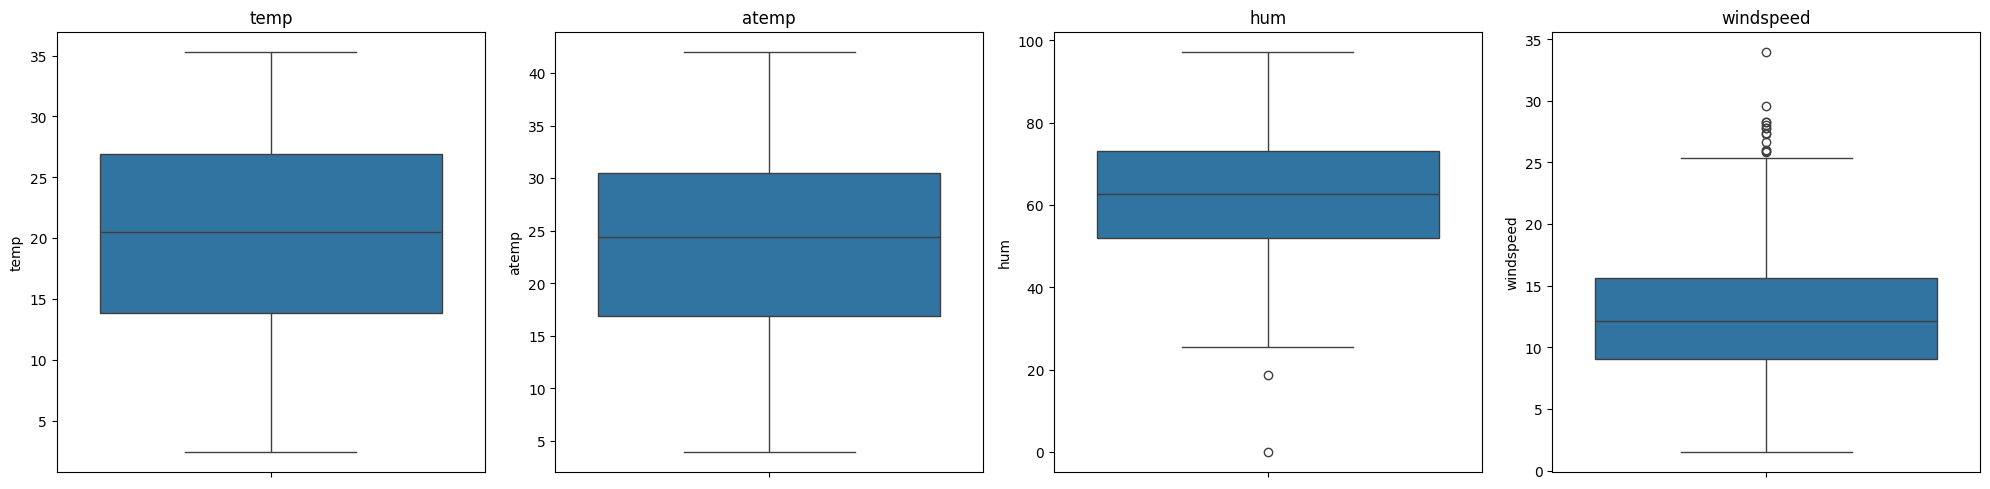

In [22]:
# Create box plots for Numerical Columns
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(20, 5))

# Loop through the columns and plot each boxplot in the respective subplot
for i, col in enumerate(num_cols):
    sns.boxplot(y=col, data=bikesharing1, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

#### Inference:
Based on these plots, there are no outliers to deal with, so the dataset is free from any outliers.

### Univariate Analysis 

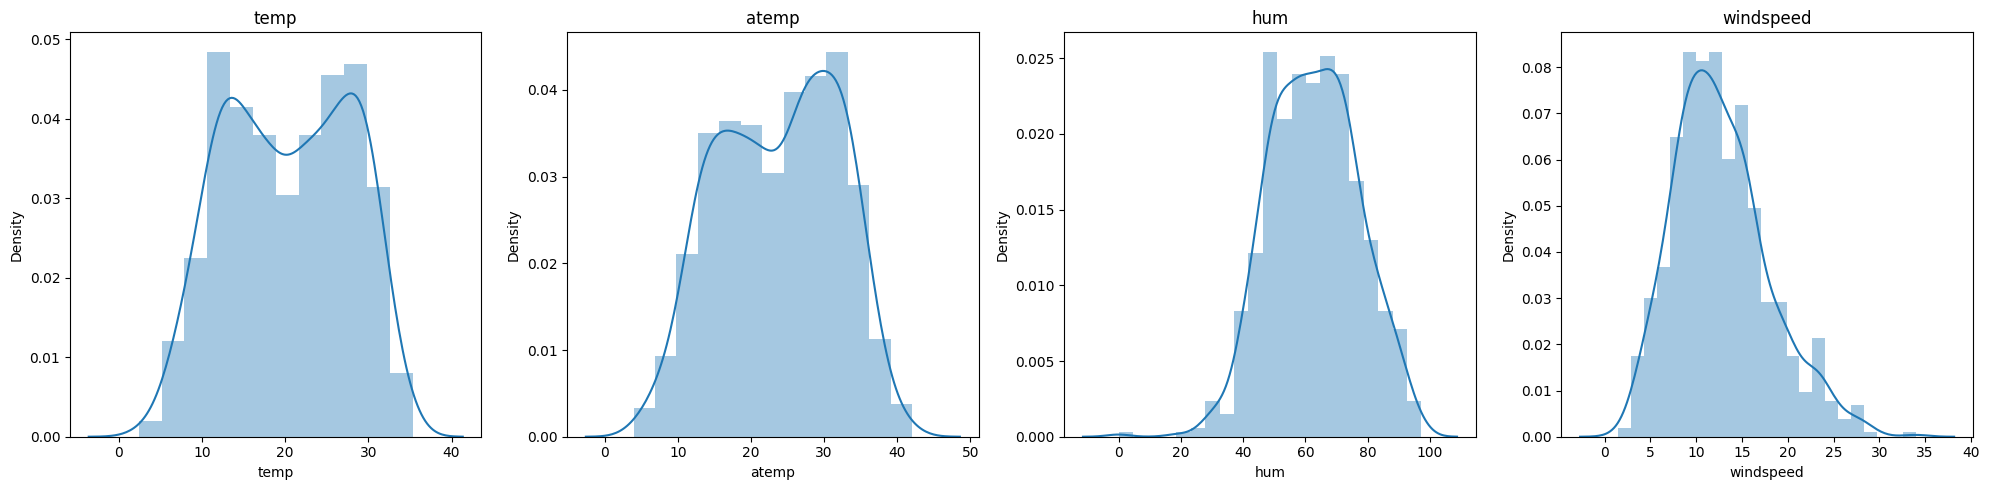

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(20, 5))

# Plot histograms on subplots
for i, col in enumerate(num_cols):
    sns.distplot(bikesharing1[col], ax=axes[i])
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()
plt.show()

#### Inference:
These distplots provide insights into the typical values and variability of the four variables. Temperature and apparent temperature are generally similar, whereas humidity and windspeed exhibit greater variation.

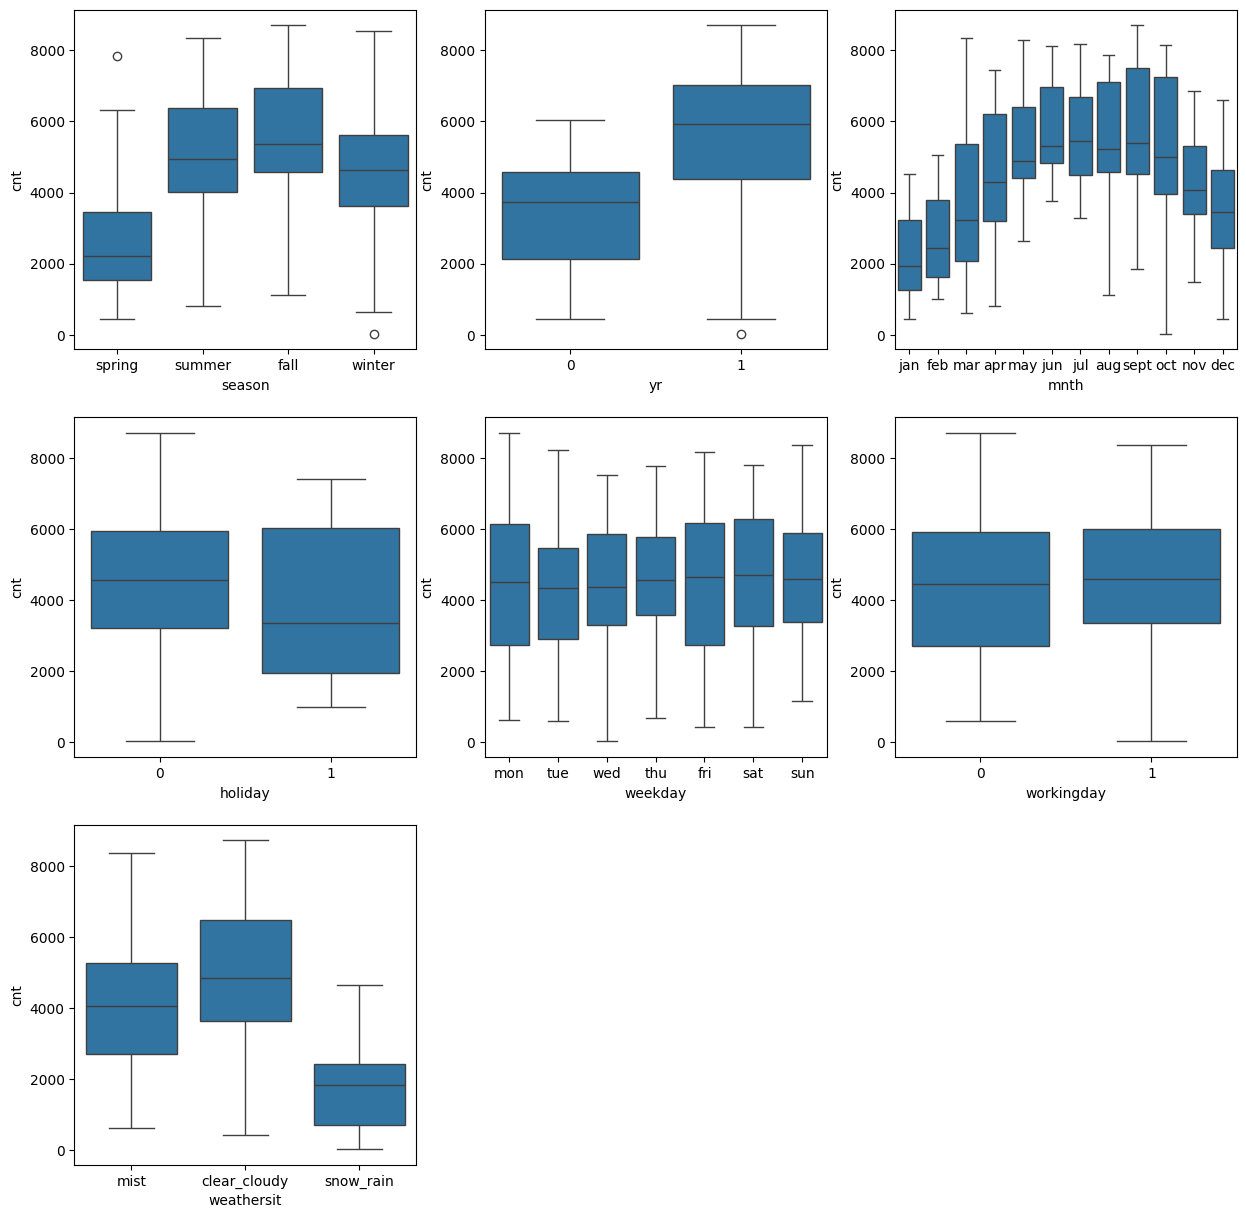

In [27]:
plt.figure(figsize=(15, 15))
for i in enumerate(cat_cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikesharing1, x=i[1], y='cnt')
plt.show()

#### Inference:
Several insights can be drawn from the plots:

1. **Season:** Fall (Season 3) shows the highest demand for rental bikes.
2. **Yearly Trend:** Demand has increased compared to the previous year.
3. **Monthly Trend:** Demand grows continuously each month until June, with September exhibiting the highest demand. After September, demand begins to decrease.
4. **Holidays:** Demand decreases during holiday periods.
5. **Weekdays:** Demand patterns do not show a clear trend based on weekdays.
6. **Weather:** Clear weather conditions correlate with the highest demand for bikes.
7. **Seasonal Variation:** Bike sharing is more prevalent in September, while it decreases towards the end and beginning of the year, possibly due to extreme weather conditions.

### Bivariate Analysis

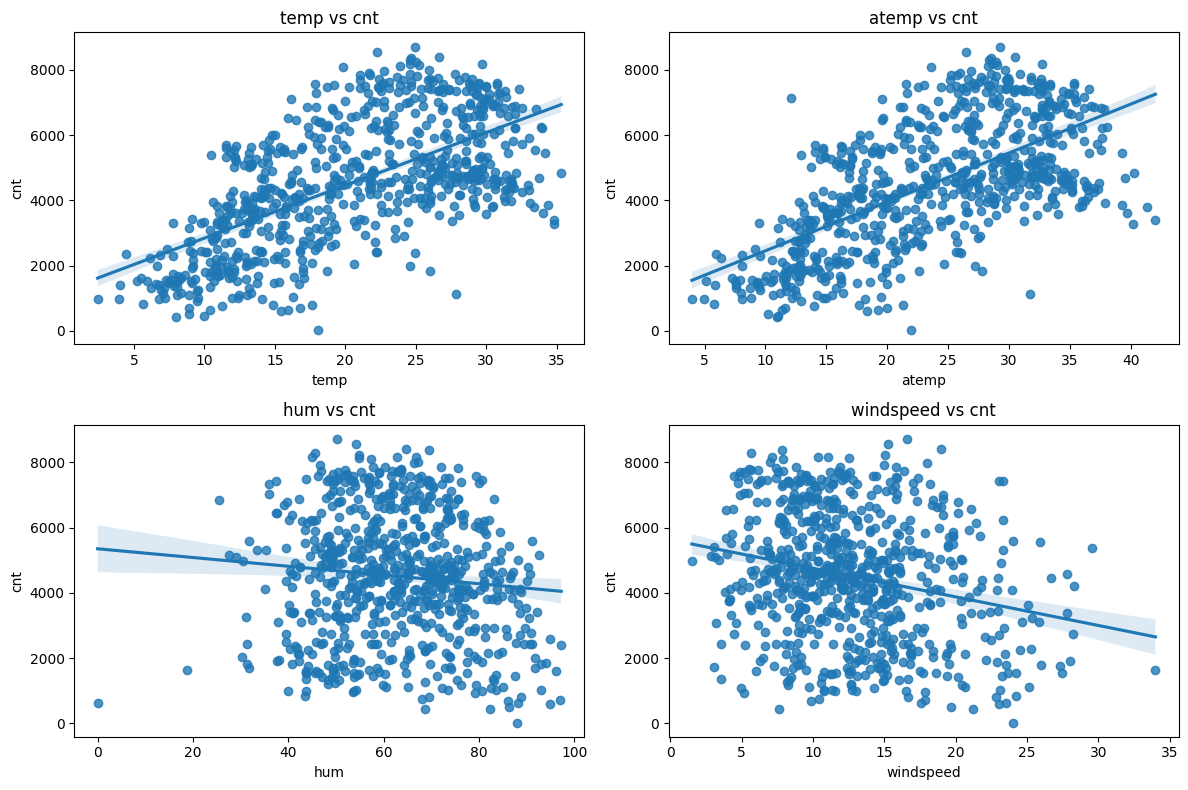

In [30]:
# Create subplots grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through the numerical columns and create scatter plots
for i, col in enumerate(num_cols):
    sns.regplot(x=bikesharing1[col], y=bikesharing1["cnt"], ax=axes[i])
    axes[i].set_title(f'{col} vs cnt')

# Adjust layout
plt.tight_layout()
plt.show()

#### Inference:
- Demand for bikes shows a positive correlation with temperature. The count of bike rentals increases linearly with temperature, indicating a clear linear relationship.
- In contrast, humidity values are more dispersed, and there is an observable trend of decreasing demand as humidity increases.
- Similarly, windspeed values are also scattered, and the count of bike rentals tends to decrease with increasing windspeed.

#### Pre-processing steps
Dummy Vaiable Creation (One Hot Encodeing)

##### dummies for categorical variable
- season
- mnth
- weekday
- weathersit

In [33]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(bikesharing1[['season','weathersit','weekday','mnth']], drop_first = True, dtype=int)

# Add the results to the original bikesharing dataframe
bikesharing1 = pd.concat([bikesharing1, status], axis = 1)

# Drop 'season','weathersit','weekday','mnth' as we have created the dummies for it
bikesharing1.drop(['season','weathersit','weekday','mnth'], axis = 1, inplace = True)

# Now let's see the head of our dataframe.
bikesharing1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [34]:
bikesharing1.columns=bikesharing1.columns.astype(str)
bikesharing1.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_mist', 'weathersit_snow_rain', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept'],
      dtype='object')

In [35]:
bikesharing1.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


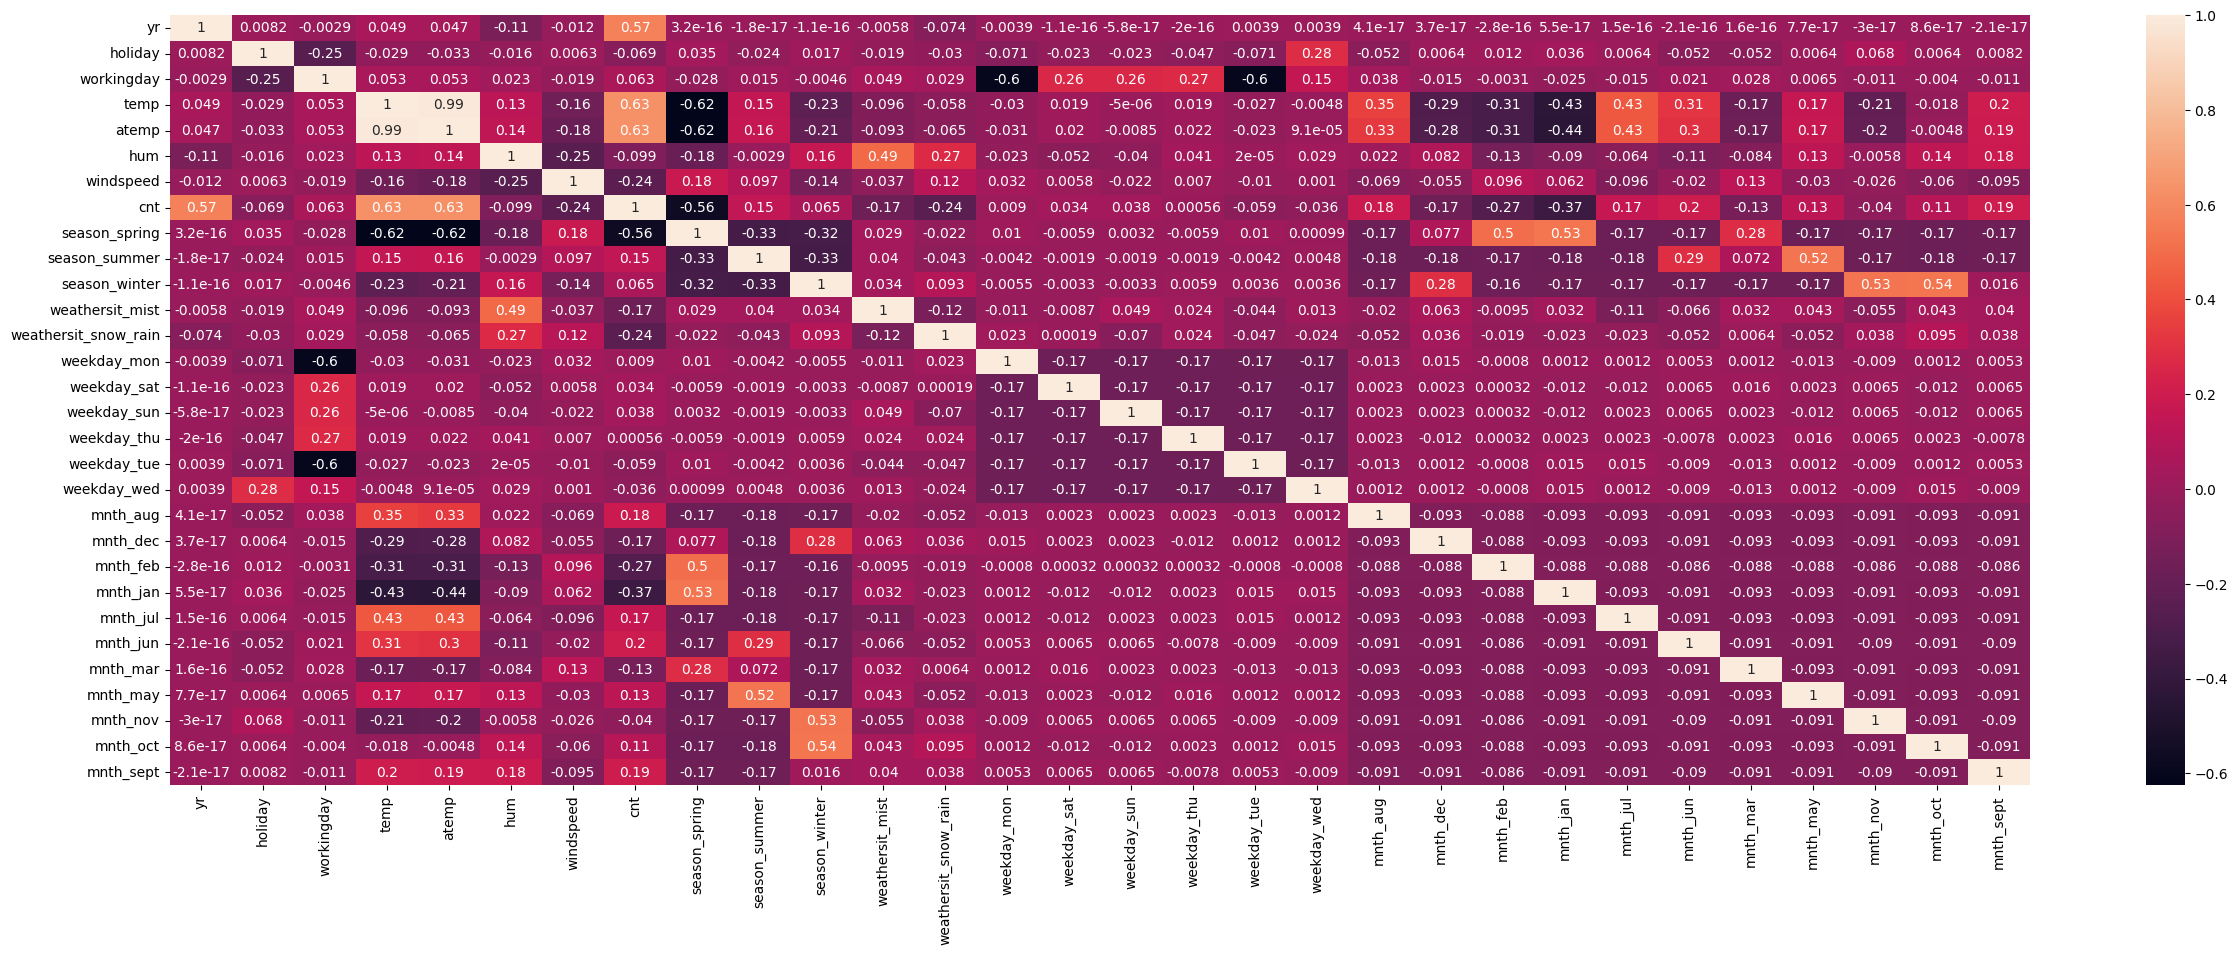

In [36]:
plt.figure(figsize=(30,10))
sns.heatmap(bikesharing1.corr(),annot=True)
plt.show()

#### Plotting heatmap for Correlation analysis
- temp & atemp are highly correlated with each other

In [38]:
bikesharing1.nunique()

yr                        2
holiday                   2
workingday                2
temp                    498
atemp                   689
hum                     594
windspeed               649
cnt                     695
season_spring             2
season_summer             2
season_winter             2
weathersit_mist           2
weathersit_snow_rain      2
weekday_mon               2
weekday_sat               2
weekday_sun               2
weekday_thu               2
weekday_tue               2
weekday_wed               2
mnth_aug                  2
mnth_dec                  2
mnth_feb                  2
mnth_jan                  2
mnth_jul                  2
mnth_jun                  2
mnth_mar                  2
mnth_may                  2
mnth_nov                  2
mnth_oct                  2
mnth_sept                 2
dtype: int64

### Splitting the Data into Training and Testing Sets

In [40]:
# Checking shape before splitting
bikesharing1.shape

(730, 30)

In [41]:
X=bikesharing1.drop(["cnt"],axis=1)
y=bikesharing1["cnt"]

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [43]:
print(X_train.shape)
print(X_test.shape)

(511, 29)
(219, 29)


##### Scaling of the variables
Scaling ensures that features contribute equally to the model. If data isn't scaled, features with larger numerical ranges may dominate the learning process, even if they are not more important than features with smaller ranges.

In [45]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [46]:
X_train_df=pd.DataFrame(X_train,columns=X.columns)
X_test_df=pd.DataFrame(X_test,columns=X.columns)

In [47]:
X_train_df.head(2)

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept
0,0.98254,-0.161569,0.690564,-0.121991,-0.056605,-0.514975,-0.118309,-0.566051,-0.572078,1.738857,...,-0.303118,-0.266981,-0.310752,-0.287449,-0.287449,-0.329332,-0.303118,-0.30695,3.257858,-0.295354
1,0.98254,-0.161569,0.690564,1.232298,1.194457,0.517177,-0.331370,-0.566051,-0.572078,-0.575091,...,-0.303118,-0.266981,-0.310752,3.478874,-0.287449,-0.329332,-0.303118,-0.30695,-0.306950,-0.295354


In [48]:
X_test_df.head(2)

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept
0,-1.01777,6.189321,-1.448092,1.306004,1.210067,0.048287,-1.396242,-0.566051,-0.572078,-0.575091,...,-0.303118,-0.266981,-0.310752,3.478874,-0.287449,-0.329332,-0.303118,-0.30695,-0.30695,-0.295354
1,0.98254,-0.161569,0.690564,1.614633,1.554074,-0.276107,-0.986093,-0.566051,1.748015,-0.575091,...,-0.303118,-0.266981,-0.310752,-0.287449,3.478874,-0.329332,-0.303118,-0.30695,-0.30695,-0.295354


## Building our model

### Feature Selection
Recursive feature elimination (RFE)
<br>automated way of selection of features or varaibles 

In [51]:
# Running RFE with the output number of the variable equal to 15
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=15)

selector=selector.fit(X_train_df,y_train)

In [52]:
list(zip(X_train_df.columns,selector.support_,selector.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weathersit_mist', True, 1),
 ('weathersit_snow_rain', True, 1),
 ('weekday_mon', False, 6),
 ('weekday_sat', False, 14),
 ('weekday_sun', False, 11),
 ('weekday_thu', False, 10),
 ('weekday_tue', True, 1),
 ('weekday_wed', False, 8),
 ('mnth_aug', False, 9),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 3),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 13),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 4),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 12),
 ('mnth_sept', True, 1)]

In [53]:
selected_features=X_train_df.columns[selector.support_] 
print(selected_features)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_mist',
       'weathersit_snow_rain', 'weekday_tue', 'mnth_jan', 'mnth_jul',
       'mnth_nov', 'mnth_sept'],
      dtype='object')


#### Inference:
List of featurs selected for building the model

In [55]:
X_train_df.columns[~selector.support_]

Index(['workingday', 'atemp', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_wed', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_oct'],
      dtype='object')

In [56]:
X_train=X_train_df[selected_features]
X_test=X_test_df[selected_features]

In [57]:
X_train.head(2)

,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,weathersit_mist,weathersit_snow_rain,weekday_tue,mnth_jan,mnth_jul,mnth_nov,mnth_sept
0,0.98254,-0.161569,-0.121991,-0.514975,-0.118309,-0.566051,-0.572078,1.738857,-0.724826,-0.173902,-0.408248,-0.310752,-0.287449,-0.30695,-0.295354
1,0.98254,-0.161569,1.232298,0.517177,-0.331370,-0.566051,-0.572078,-0.575091,-0.724826,-0.173902,-0.408248,-0.310752,3.478874,-0.30695,-0.295354


In [58]:
X_test.head(2)

,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,weathersit_mist,weathersit_snow_rain,weekday_tue,mnth_jan,mnth_jul,mnth_nov,mnth_sept
0,-1.01777,6.189321,1.306004,0.048287,-1.396242,-0.566051,-0.572078,-0.575091,1.379641,-0.173902,-0.408248,-0.310752,3.478874,-0.30695,-0.295354
1,0.98254,-0.161569,1.614633,-0.276107,-0.986093,-0.566051,1.748015,-0.575091,-0.724826,-0.173902,-0.408248,-0.310752,-0.287449,-0.30695,-0.295354


## Modeling
### Building model using statsmodel, for the detailed statistics

In [60]:
# Adding a constant variable 
X_train_sm = sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

#### Model 1

In [62]:
model1 = sm.OLS(np.array(y_train),X_train_sm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     185.1
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          7.37e-192
Time:                        22:01:42   Log-Likelihood:                -4114.1
No. Observations:                 511   AIC:                             8260.
Df Residuals:                     495   BIC:                             8328.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4491.3033 

In [63]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=X_train_sm.columns 
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))] 
vif_data['VIF'] = round(vif_data['VIF'], 4)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

,Feature,VIF
6,season_spring,5.2010
3,temp,3.9705
8,season_winter,3.7696
7,season_summer,2.6832
4,hum,1.9139
9,weathersit_mist,1.5697
12,mnth_jan,1.5694
13,mnth_jul,1.4907
14,mnth_nov,1.4850
15,mnth_sept,1.3129


#### Inference:
p-value is high for `mnth_nov` (>0.05) so dropping this variable

#### Model 2
##### Rebuilding the model without `mnth_nov`

In [66]:
X_train_sm = X_train_sm.drop(["mnth_nov"], axis = 1)
X_test_sm=X_test_sm.drop(["mnth_nov"],axis=1)

In [67]:
model2 = sm.OLS(np.array(y_train),X_train_sm).fit()

#Let's see the summary of our linear model
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.7
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.55e-192
Time:                        22:01:42   Log-Likelihood:                -4115.2
No. Observations:                 511   AIC:                             8260.
Df Residuals:                     496   BIC:                             8324.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4491.3033 

In [68]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=X_train_sm.columns 
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))] 
vif_data['VIF'] = round(vif_data['VIF'], 4)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

,Feature,VIF
6,season_spring,5.0867
3,temp,3.8872
8,season_winter,3.6006
7,season_summer,2.6502
4,hum,1.9121
9,weathersit_mist,1.5695
12,mnth_jan,1.5678
13,mnth_jul,1.4905
14,mnth_sept,1.2971
10,weathersit_snow_rain,1.2519


#### Inference:
p-value is close to high for `mnth_jan` (>0.05) so dropping this variable

#### Model 3
##### Rebuilding the model without `mnth_jan`

In [71]:
X_train_sm = X_train_sm.drop(["mnth_jan"], axis = 1)
X_test_sm=X_test_sm.drop(["mnth_jan"],axis=1)

In [72]:
model3 = sm.OLS(np.array(y_train),X_train_sm).fit()

#Let's see the summary of our linear model
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          7.13e-193
Time:                        22:01:42   Log-Likelihood:                -4117.2
No. Observations:                 511   AIC:                             8262.
Df Residuals:                     497   BIC:                             8322.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4491.3033 

#### Inference:
all the columns having `p-value` < 0.05 so chacking `VIF` value

In [74]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=X_train_sm.columns 
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))] 
vif_data['VIF'] = round(vif_data['VIF'], 4)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

,Feature,VIF
6,season_spring,5.0215
3,temp,3.6146
8,season_winter,3.4943
7,season_summer,2.6233
4,hum,1.9043
9,weathersit_mist,1.5695
12,mnth_jul,1.4872
13,mnth_sept,1.2967
10,weathersit_snow_rain,1.2491
5,windspeed,1.1946


#### Inference:
`season_spring` having high `VIF` value >5, also it has negative coefficient with `cnt` so dropping it 

#### Model 4
##### Rebuilding the model without `season_spring`

In [77]:
X_train_sm = X_train_sm.drop(["season_spring"], axis = 1)
X_test_sm=X_test_sm.drop(["season_spring"],axis=1)

In [78]:
model4 = sm.OLS(np.array(y_train),X_train_sm).fit()

#Let's see the summary of our linear model
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     225.6
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.60e-192
Time:                        22:01:43   Log-Likelihood:                -4120.8
No. Observations:                 511   AIC:                             8268.
Df Residuals:                     498   BIC:                             8323.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4491.3033 

In [79]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=X_train_sm.columns 
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))] 
vif_data['VIF'] = round(vif_data['VIF'], 4)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

,Feature,VIF
4,hum,1.8804
3,temp,1.6033
8,weathersit_mist,1.5579
11,mnth_jul,1.4329
6,season_summer,1.3301
7,season_winter,1.2877
9,weathersit_snow_rain,1.2428
12,mnth_sept,1.1908
5,windspeed,1.1816
1,yr,1.0296


#### Inference:
Dropping `mnth_jul` since its coefficient with cnt is close to zero, indicating it has minimal impact. Therefore, it is being removed.

#### Model 5
##### Rebuilding the model without `mnth_jul`

In [82]:
X_train_sm = X_train_sm.drop(["mnth_jul"], axis = 1)
X_test_sm=X_test_sm.drop(["mnth_jul"],axis=1)

In [83]:
model5 = sm.OLS(np.array(y_train),X_train_sm).fit()

#Let's see the summary of our linear model
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     242.9
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.40e-192
Time:                        22:01:43   Log-Likelihood:                -4124.1
No. Observations:                 511   AIC:                             8272.
Df Residuals:                     499   BIC:                             8323.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4491.3033 

In [84]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=X_train_sm.columns 
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))] 
vif_data['VIF'] = round(vif_data['VIF'], 4)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

,Feature,VIF
4,hum,1.8659
8,weathersit_mist,1.5578
3,temp,1.2731
7,season_winter,1.2544
9,weathersit_snow_rain,1.2393
6,season_summer,1.1930
5,windspeed,1.1799
11,mnth_sept,1.1160
1,yr,1.0276
2,holiday,1.0206


#### Inference:
This model includes all parameters, and based on its performance, we consider it to be the final model.

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [87]:
y_train_pred=model5.predict(X_train_sm)
y_test_pred=model5.predict(X_test_sm)

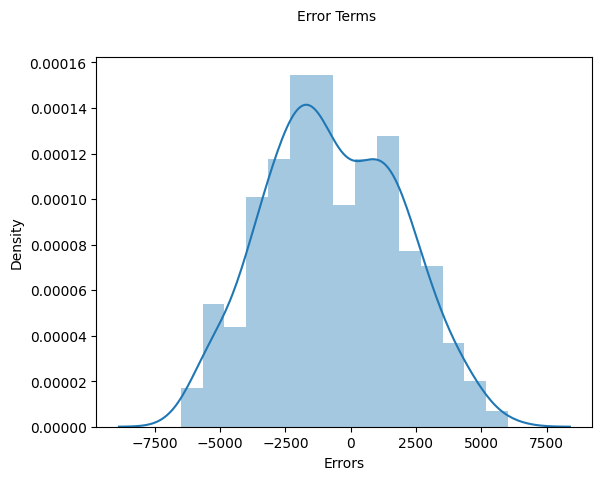

In [88]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 15)
fig.suptitle('Error Terms', fontsize = 10)                  # Plot heading 
plt.xlabel('Errors', fontsize = 10)                         # X-label
plt.show()

In [89]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Train:",round(r2_train,3),"Test:",round(r2_test,3))

Train: 0.843 Test: 0.806


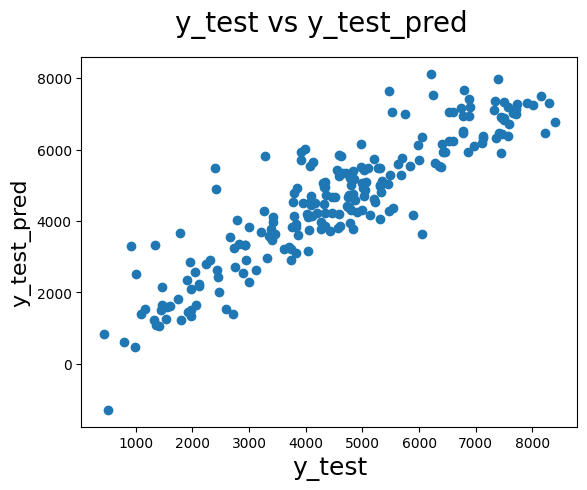

In [90]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

### Interepretation of results
#### Model Summary:
* `R-squared` (0.843): The model explains 84.3% of the variance in bike demand, indicating a strong fit.
* `Adjusted R-squared` (0.839): After adjusting for the number of predictors, the model still explains a substantial portion of the variance, confirming its robustness.
* `F-statistic` (242.9, p < 0.0001): The overall model is highly significant, meaning that at least one of the predictors is significantly related to bike demand.

#### Coefficients and Significance:
* `yr` (997.28): The demand for bikes increases by approximately 997 units in the observed year compared to the base year, holding all other factors constant. This is highly significant (p < 0.0001).
* `holiday` (-144.32): On holidays, bike demand decreases by approximately 144 units, suggesting lower demand during holidays, which is significant (p < 0.0001).
* `temp` (1114.64): For each unit increase in temperature (likely in Celsius), bike demand increases by about 1115 units. This indicates a strong positive relationship with temperature (p < 0.0001).
* `hum` (-210.09): For each unit increase in humidity, bike demand decreases by about 210 units, indicating a negative impact of higher humidity on demand (p < 0.0001).
* `windspeed` (-272.33): An increase in windspeed by one unit is associated with a decrease in demand by approximately 272 units, highlighting a negative impact of wind on bike usage (p < 0.0001).
* `season_summer` (338.01): Bike demand is higher by approximately 338 units during summer compared to other seasons (p < 0.0001).
* `season_winter` (530.94): Bike demand is significantly higher during winter by about 531 units, compared to other seasons (p < 0.0001).
* weathersit_mist (-224.31): Demand decreases by approximately 224 units during misty weather, indicating a negative effect (p < 0.0001).
* `weathersit_snow_rain` (-357.52): Bike demand is reduced by about 358 units during snow or rain, showing a significant negative impact (p < 0.0001).
* `weekday_tue` (-142.23): On Tuesdays, bike demand is lower by approximately 142 units compared to other days of the week (p < 0.0001).
* `mnth_sept` (247.10): Demand in September is about 247 units higher compared to other months (p < 0.0001).

#### Summary:
The model reveals that temperature, humidity, and windspeed are significant predictors of bike demand, with temperature having a strong positive effect and humidity and windspeed having negative effects. Seasonal and weather conditions, as well as specific days and months, also significantly impact bike demand. 


#### Based on the analysis of the regression model, the company should focus on the following features to optimize bike-sharing operations:
1. **Temperature (temp)**:
    <br>*Focus*: Implement strategies to maximize bike availability and marketing efforts during warmer temperatures, as higher temperatures significantly boost bike demand.
   
2. **Humidity (hum)**:
    <br>*Focus*: Monitor humidity levels and adjust bike-sharing operations accordingly. Since higher humidity negatively impacts demand, the company might consider promoting bike-sharing options or providing amenities to mitigate the effects of high humidity.

3. **Windspeed (windspeed)**:
    <br>*Focus*: Be aware of the impact of windspeed on bike demand. During high wind conditions, demand decreases, so the company could consider special promotions or operational adjustments on windy days.
   
4. **Seasonal Variations (summer, winter)**:
    <br>*Focus*: Adjust bike availability and marketing strategies based on the season. The model indicates higher demand during summer and winter, so the company should ensure adequate bike supply and tailored marketing during these seasons.
   
5. **Weather Conditions (mist, snow or rain)**:
    <br>*Focus*: Prepare for lower bike demand during misty or snowy/rainy weather by optimizing bike distribution and implementing targeted promotions to encourage usage despite adverse conditions.
   
6. **Day of the Week (Tuesday)**:
    <br>*Focus*: Since bike demand is lower on Tuesdays, the company might consider running specific promotions or adjusting bike distribution on this day to boost usage.
   
7. **Month (September)**:
    <br>*Focus*: September shows higher demand, so the company should ensure sufficient bike availability and potentially increase marketing efforts during this month.
   
`By focusing on these features, BoomBikes can better align their operations with factors that influence bike demand, improving service efficiency and potentially increasing revenue.`